In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
import statsmodels.api as sm

In [2]:
#Read the data about Ad_status
ads = pd.read_csv (r'C:\Users\DUONG\Desktop\iKame\[Câu 1][PBI]\Ad_Status.csv')
print (ads)

        version                    user_pseudo_id        country  \
0      6.16.179                       5.90622E+31    Philippines   
1      6.16.179  000012d925a9c63a175b9da827bfc044          India   
2      6.16.179  0002edb96b20adaf06d3d8b216d62041         Brazil   
3      6.16.179  0002edb96b20adaf06d3d8b216d62041         Brazil   
4      6.16.179  0002edb96b20adaf06d3d8b216d62041         Brazil   
...         ...                               ...            ...   
49995  6.16.181  fffd97d4de9a5bda58ea77be7e3f7a67  United States   
49996  6.16.181  fffd97d4de9a5bda58ea77be7e3f7a67  United States   
49997  6.16.179  fffea183cd8cbd675544e41770fd22f4          India   
49998  6.16.179  fffea183cd8cbd675544e41770fd22f4          India   
49999  6.16.179  fffea183cd8cbd675544e41770fd22f4          India   

      mobile_brand_name event_name operating_system traffic_source_medium  \
0                  Vivo  ad_status          ANDROID                   cpc   
1               Samsung  ad_s

Đối với yêu cầu phân tích, ta sẽ quan sát một số biến có thể rút ra từ bộ số liệu

In [3]:
#Biến 1: tần suất xem quảng cáo của từng người dùng trong game
freq = ads.loc[:, ['user_pseudo_id', 'event_name']].groupby('user_pseudo_id').count()
freq = freq.rename(columns={'event_name': 'user_freq'})
print(freq)

                                  user_freq
user_pseudo_id                             
000012d925a9c63a175b9da827bfc044          1
0002edb96b20adaf06d3d8b216d62041          5
0003409a416d5edc9891d6a1a527c17a          1
000367b2458bc89906c41c43488f0629          1
00074cd713950d566385d0d5dff9f421          1
...                                     ...
fffbf1c146dce4c23b3b535aab4a3cc9          4
fffc57a84c76fb59bdbede0adbe13189          3
fffd4c2bfaa3c26df6065c9d61418450          1
fffd97d4de9a5bda58ea77be7e3f7a67          2
fffea183cd8cbd675544e41770fd22f4          3

[31776 rows x 1 columns]


Lượt xem thấp nhất của 1 người dùng: 1
Lượt xem cao nhất của 1 người dùng: 41
Lượt xem trung bình của 1 người dùng: 1.5735146022155087
AxesSubplot(0.125,0.125;0.775x0.755)


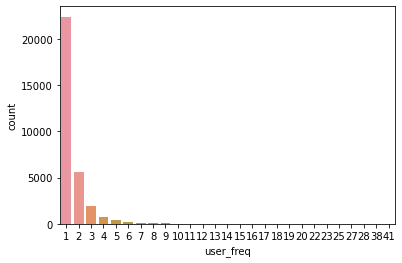

In [4]:
#Xem tỷ lệ phân phối của biến 1
print('Lượt xem thấp nhất của 1 người dùng: ' + str(min(freq['user_freq'])))
print('Lượt xem cao nhất của 1 người dùng: ' + str(max(freq['user_freq'])))
print('Lượt xem trung bình của 1 người dùng: ' + str(freq['user_freq'].mean()))
hist1 = sns.countplot(x='user_freq',data=freq)
print(hist1)

AxesSubplot(0.125,0.125;0.775x0.755)


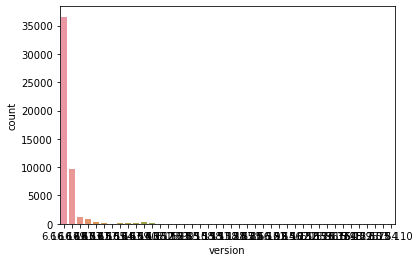

In [5]:
#Biến 2: Mức độ cập nhật của phiên bản game - xem phân phối của biến
hist2 = sns.countplot(x='version',data=ads)
print(hist2)

Ta thấy biến này đang bị chia quá nhỏ dẫn đến chênh lệch đáng kể giữa các phân phối => phân loại lại biến

In [6]:
#Chia mức độ cập nhật của phiên bản theo thang đo từ 1-6
conditions = [
    (ads['version'].str.startswith('1') == True),
    (ads['version'].str.startswith('2') == True),
    (ads['version'].str.startswith('3') == True),
    (ads['version'].str.startswith('4') == True),
    (ads['version'].str.startswith('5') == True),
    (ads['version'].str.startswith('6') == True)
    ]
values = [1, 2, 3, 4, 5, 6]
ads['ver_upd'] = np.select(conditions, values)
upd = ads.loc[:, ['user_pseudo_id', 'ver_upd']].groupby('user_pseudo_id').first()
print(upd)

                                  ver_upd
user_pseudo_id                           
000012d925a9c63a175b9da827bfc044        6
0002edb96b20adaf06d3d8b216d62041        6
0003409a416d5edc9891d6a1a527c17a        6
000367b2458bc89906c41c43488f0629        6
00074cd713950d566385d0d5dff9f421        6
...                                   ...
fffbf1c146dce4c23b3b535aab4a3cc9        6
fffc57a84c76fb59bdbede0adbe13189        6
fffd4c2bfaa3c26df6065c9d61418450        6
fffd97d4de9a5bda58ea77be7e3f7a67        6
fffea183cd8cbd675544e41770fd22f4        6

[31776 rows x 1 columns]


Số người dùng xem quảng cáo trong phiên bản cũ nhất (phiên bản 1): 3
Số người dùng xem quảng cáo trong phiên bản mới nhất (phiên bản 6): 31476
AxesSubplot(0.125,0.125;0.775x0.755)


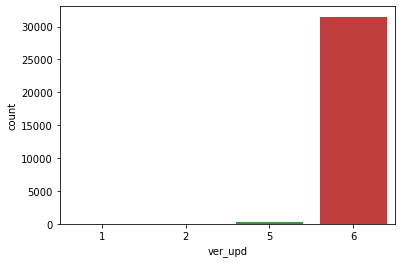

In [7]:
#Xem tỷ lệ phân phối của biến 2
print('Số người dùng xem quảng cáo trong phiên bản cũ nhất (phiên bản 1): ' + str(upd[upd.ver_upd == 1]['ver_upd'].count()))
print('Số người dùng xem quảng cáo trong phiên bản mới nhất (phiên bản 6): ' + str(upd[upd.ver_upd == 6]['ver_upd'].count()))
hist02 = sns.countplot(x='ver_upd',data=upd)
print(hist02)

                                  ver_upd  user_freq
user_pseudo_id                                      
000012d925a9c63a175b9da827bfc044        6          1
0002edb96b20adaf06d3d8b216d62041        6          5
0003409a416d5edc9891d6a1a527c17a        6          1
000367b2458bc89906c41c43488f0629        6          1
00074cd713950d566385d0d5dff9f421        6          1
...                                   ...        ...
fffbf1c146dce4c23b3b535aab4a3cc9        6          4
fffc57a84c76fb59bdbede0adbe13189        6          3
fffd4c2bfaa3c26df6065c9d61418450        6          1
fffd97d4de9a5bda58ea77be7e3f7a67        6          2
fffea183cd8cbd675544e41770fd22f4        6          3

[31776 rows x 2 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


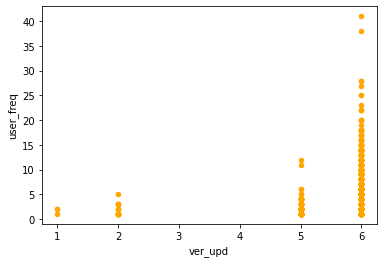

In [8]:
#Theo dõi tương quan giữa biến 1 và biến 2
merged1 = pd.merge(left=upd, right=freq, left_on='user_pseudo_id', right_on='user_pseudo_id')
chart1 = merged1.plot.scatter(x ='ver_upd', y ='user_freq', c ='#FFA500')
print(merged1)
print(chart1)

In [9]:
#Biến 3: Quy mô của thị trường trong ngành

--Dữ kiện được lấy tại link: https://rlist.io/dataset/budapesto/17736409/newzoo-game-

Biến này sẽ được đánh giá bằng thang đo từ 1 đến 6, dựa trên xếp hạng quy mô thị trường game theo quốc gia, với các quốc gia có doanh thu trên 10 tỷ đô được đánh giá 6 điểm, các quốc gia có doanh thu trên 1 tỷ đô được đánh giá 5 điểm, các quốc gia có doanh thu trên 400 triệu đô được đánh giá 4 điểm, các quốc gia có doanh thu trên 100 triệu đô được đánh giá 3 điểm, các quốc gia còn lại trong top 100 được đánh giá 2 điểm và các quốc gia ngoài top 100 được đánh giá 1 điểm

In [10]:
#Read the data about marker ranking
rank = pd.read_excel (r'Desktop\ranking.xlsx')
print(rank)

            country  market_size
0       Afghanistan            1
1           Albania            2
2           Algeria            3
3    American Samoa            1
4            Angola            2
..              ...          ...
193         Vietnam            4
194  Western Sahara            1
195           Yemen            1
196          Zambia            1
197        Zimbabwe            1

[198 rows x 2 columns]


AxesSubplot(0.125,0.125;0.775x0.755)


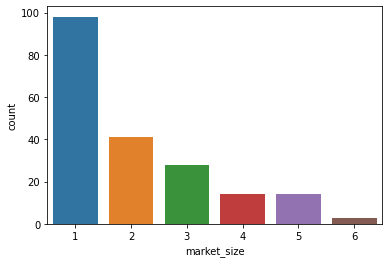

In [11]:
#Xem phân phối của biến 3
hist3 = sns.countplot(x='market_size',data=rank)
print(hist3)

                                  user_freq        country  market_size
user_pseudo_id                                                         
000012d925a9c63a175b9da827bfc044          1          India            5
0002edb96b20adaf06d3d8b216d62041          5         Brazil            5
0003409a416d5edc9891d6a1a527c17a          1        Vietnam            4
000367b2458bc89906c41c43488f0629          1       Colombia            3
00074cd713950d566385d0d5dff9f421          1      Indonesia            5
...                                     ...            ...          ...
fffbf1c146dce4c23b3b535aab4a3cc9          4          Egypt            3
fffc57a84c76fb59bdbede0adbe13189          3          India            5
fffd4c2bfaa3c26df6065c9d61418450          1      Indonesia            5
fffd97d4de9a5bda58ea77be7e3f7a67          2  United States            6
fffea183cd8cbd675544e41770fd22f4          3          India            5

[31638 rows x 3 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


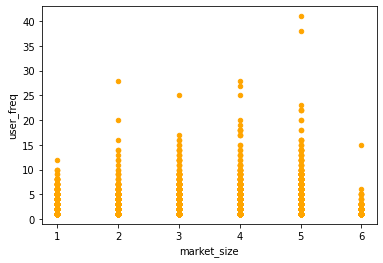

In [12]:
#Theo dõi tương quan giữa biến 1 và biến 3
merged2 = pd.merge(left=ads, right=rank, left_on='country', right_on='country')
ctr = merged2.loc[:, ['user_pseudo_id', 'country', 'market_size']].groupby('user_pseudo_id').first()
ads_per_ctr = pd.merge(left=freq, right=ctr, left_on='user_pseudo_id', right_on='user_pseudo_id')
chart2 = ads_per_ctr.plot.scatter(x ='market_size', y ='user_freq', c ='#FFA500')
print(ads_per_ctr)
print(chart2)

In [13]:
#Tổng hợp kết quả của các biến 1, biến 2 và biến 3
merged3 = pd.merge(left=merged1, right=ctr, left_on='user_pseudo_id', right_on='user_pseudo_id')
mod = merged3.loc[:, ['ver_upd', 'market_size','user_freq']].groupby('user_pseudo_id').first()
print(mod)

                                  ver_upd  market_size  user_freq
user_pseudo_id                                                   
000012d925a9c63a175b9da827bfc044        6            5          1
0002edb96b20adaf06d3d8b216d62041        6            5          5
0003409a416d5edc9891d6a1a527c17a        6            4          1
000367b2458bc89906c41c43488f0629        6            3          1
00074cd713950d566385d0d5dff9f421        6            5          1
...                                   ...          ...        ...
fffbf1c146dce4c23b3b535aab4a3cc9        6            3          4
fffc57a84c76fb59bdbede0adbe13189        6            5          3
fffd4c2bfaa3c26df6065c9d61418450        6            5          1
fffd97d4de9a5bda58ea77be7e3f7a67        6            6          2
fffea183cd8cbd675544e41770fd22f4        6            5          3

[31638 rows x 3 columns]


    event_date  total_ads
0   01/05/2021       1000
1   02/05/2021       1786
2   03/05/2021       2435
3   04/05/2021       2519
4   05/05/2021       2649
5   06/05/2021       2868
6   07/05/2021       3262
7   08/05/2021       3798
8   09/05/2021       3920
9   10/05/2021       4171
10  11/05/2021       4371
11  12/05/2021       4281
12  13/05/2021       4207
13  14/05/2021       4490
14  15/05/2021       4243
AxesSubplot(0.125,0.125;0.775x0.755)


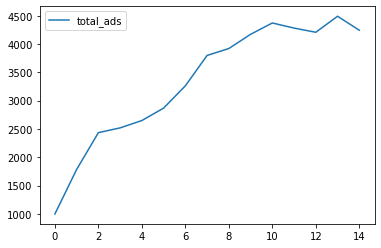

In [14]:
#Biến 4: Tổng lượt xem quảng cáo theo ngày
daily = ads.loc[:, ['event_date', 'event_name']].groupby('event_date', as_index=False).count()
daily = daily.rename(columns={'event_name': 'total_ads'})
chart3 = daily.plot.line()
print(daily)
print(chart3)

In [15]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from numpy import log

In [16]:
daily.set_index('event_date',inplace=True)
result=adfuller(daily.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print(f'Inference: The time series is {"non-" if result[1] >= 0.05 else ""}stationary')

ADF Statistic: -3.845620
p-value: 0.002474
Inference: The time series is stationary


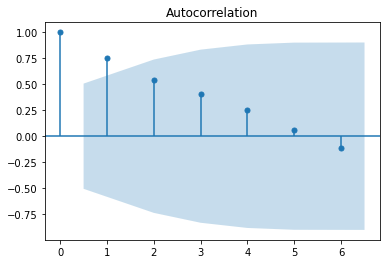

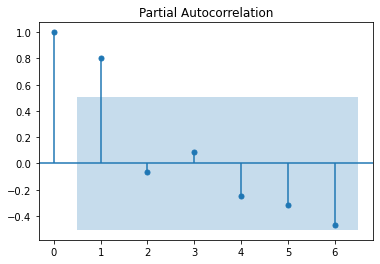

In [17]:
sm.graphics.tsa.plot_acf(daily['total_ads'].squeeze(), lags =6)
sm.graphics.tsa.plot_pacf(daily['total_ads'].squeeze(), lags =6)
plt.show()

In [18]:
warnings.filterwarnings("ignore")
mod = sm.tsa.statespace.SARIMAX(daily,
                                order=(1, 0, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7565      0.015    -52.135      0.000      -0.785      -0.728
ma.L1          0.0471      0.001     93.898      0.000       0.046       0.048
ar.S.L12       2.0234      0.063     32.209      0.000       1.900       2.146
ma.S.L12       0.1035      0.001    130.649      0.000       0.102       0.105
sigma2      6003.2204   3.22e-07   1.87e+10      0.000    6003.220    6003.220


In [19]:
pred = results.get_prediction(start=14, end=21, dynamic=False)
pred_ci = pred.conf_int()

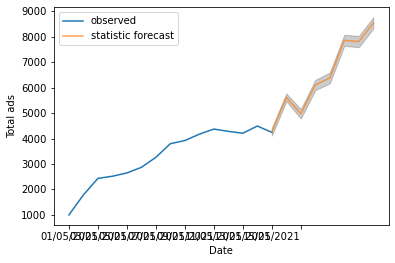

In [20]:
ax = daily['total_ads'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='statistic forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Total ads')
plt.legend()

plt.show()

In [21]:
daily_forecasted = pred.predicted_mean
print(daily_forecasted)

14    4267.269748
15    5616.091927
16    4970.212088
17    6101.176105
18    6378.389246
19    7856.861114
20    7806.043451
21    8539.346518
Name: predicted_mean, dtype: float64
